# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [17]:
 data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

 ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
     filter(sports == 'Basketball') |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     select(year, institution_name, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

In [5]:
#pulls out the colnames (just to double check)
colnames(ncaa_sports_spending)

[1] "year"             "institution_name" "men_or_women"     "expenditure_usd"

Warning message:
“Removed 609 rows containing missing values (`position_stack()`).”


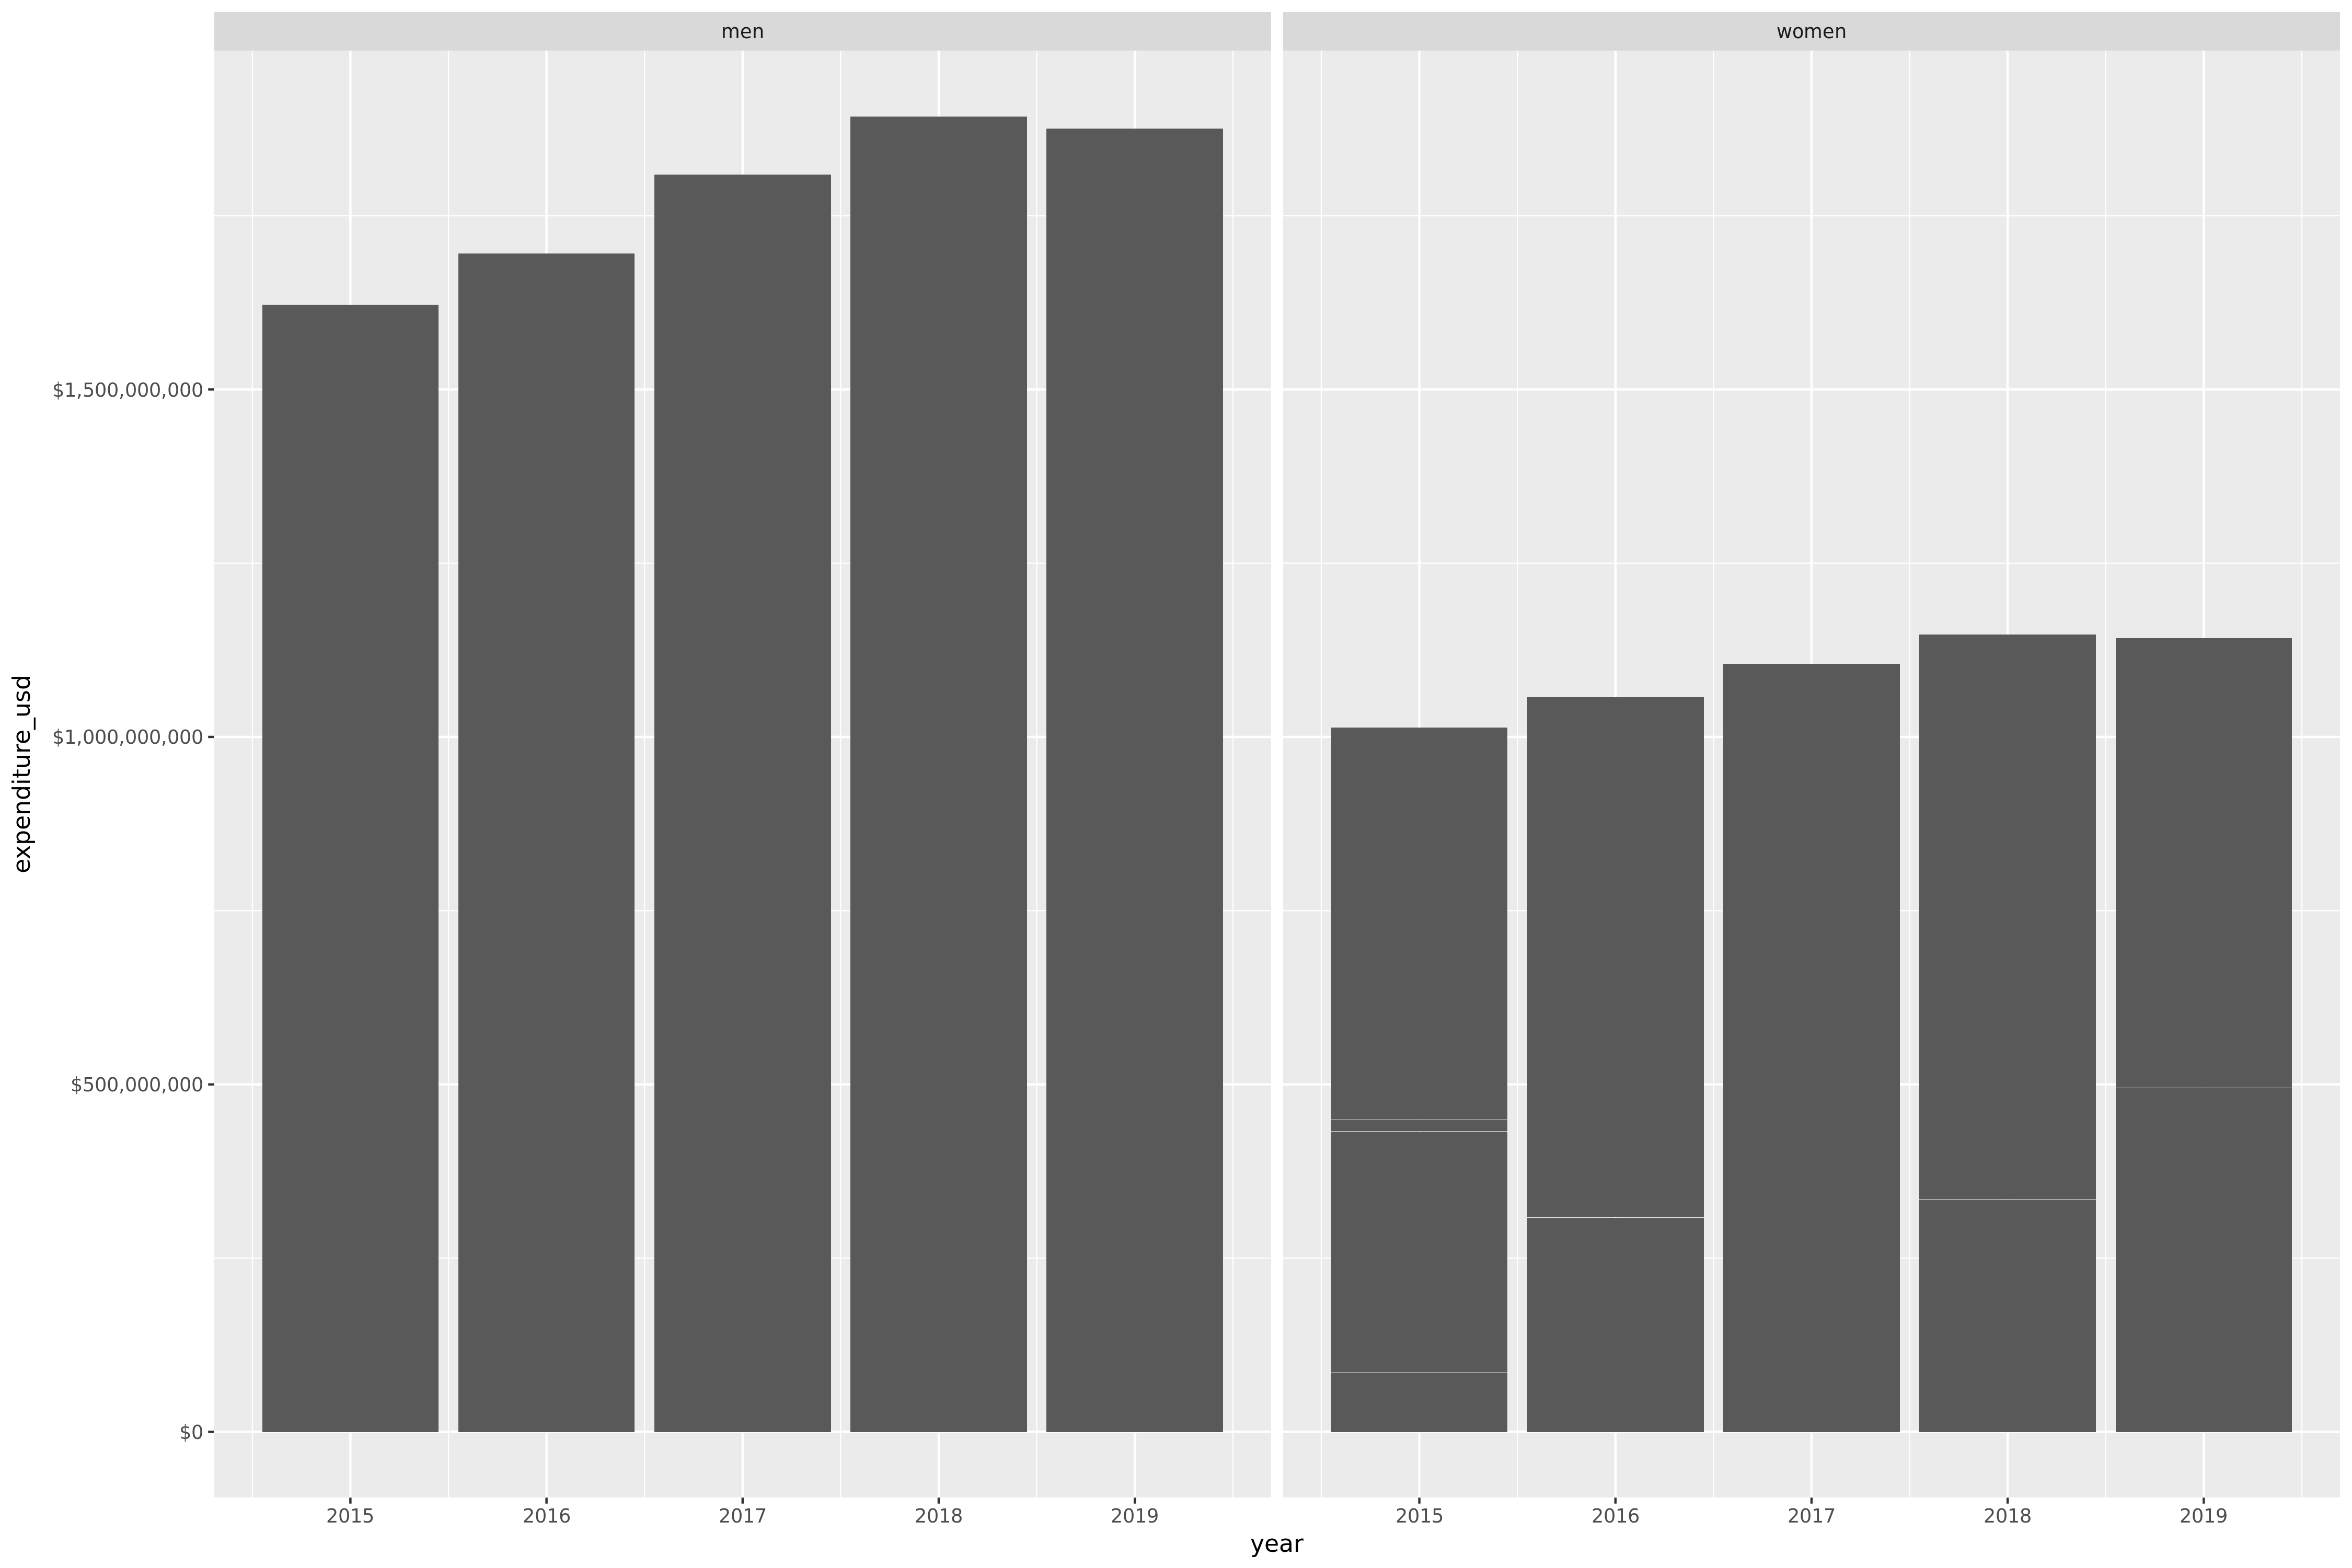

In [5]:
# bar chart code goes here
options(repr.plot.res = 300, repr.plot.height = 10, repr.plot.width = 15)

ggplot(ncaa_sports_spending, aes(x = year, y = expenditure_usd)) +
    geom_col() +
    facet_wrap(~men_or_women) +
    scale_y_continuous(labels = scales::dollar_format())


You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,men_or_women,max_spend
<dbl>,<chr>,<dbl>
2015,men,18910412
2015,women,7518348
2016,men,19507686
2016,women,7839480
2017,men,21817723
2017,women,8714436
2018,men,22178473
2018,women,9485162
2019,men,19949246


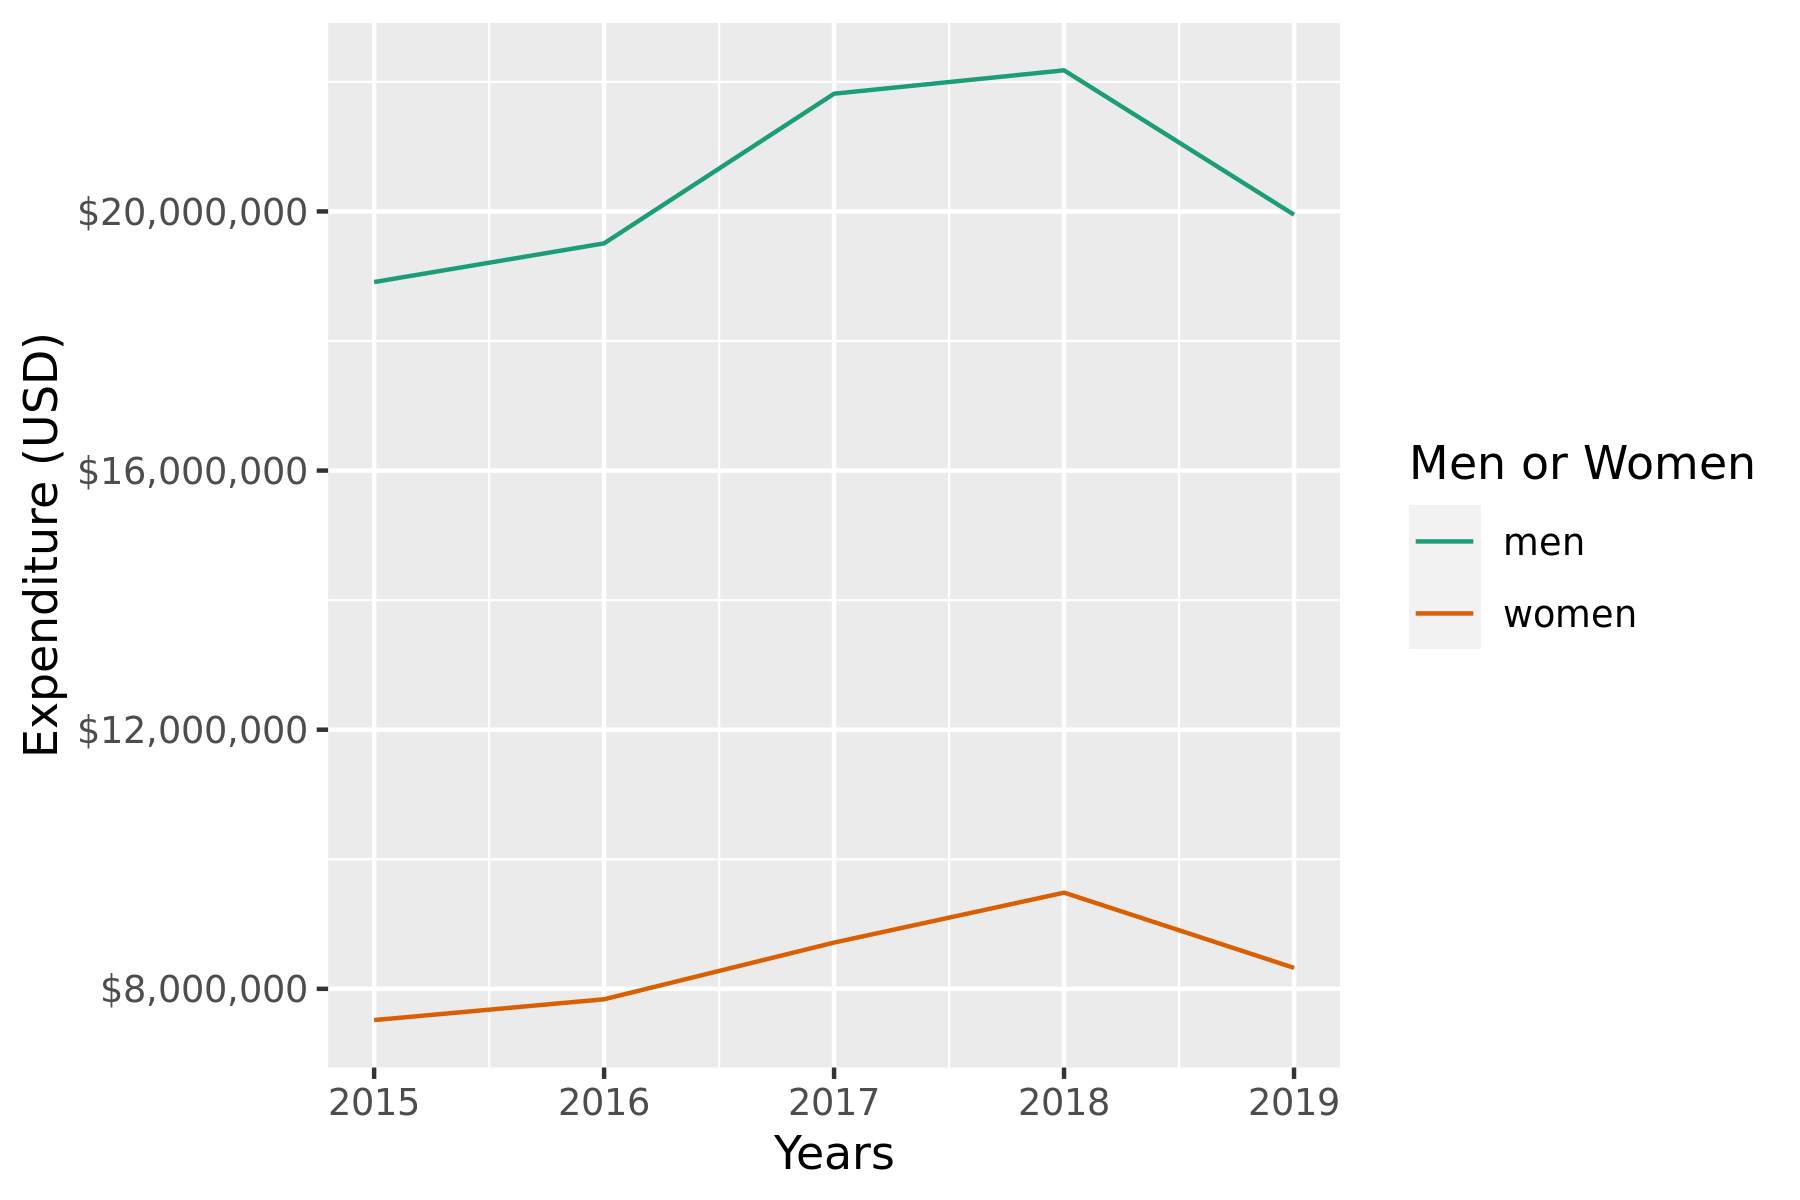

In [59]:
## line chart code goes here
#options
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

#this is to get the largets amount spent
df = ncaa_sports_spending %>%
    group_by(year, men_or_women) %>%
    summarize(max_spend = max(expenditure_usd, na.rm=TRUE))

df

#this is for the line chart
ggplot(df, aes(year, max_spend, group = men_or_women, color = men_or_women))+
    geom_line() +
    scale_y_continuous(labels = scales::dollar_format()) +
    scale_color_brewer(palette = 'Dark2') +
    labs(x = 'Years', y = 'Expenditure (USD)') +
    guides(color = guide_legend(title = 'Men or Women'))

Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [39]:
 unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
     filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     arrange(rev(men_or_women), expenditure_usd) |>
     mutate(sports = fct_inorder(sports)) |>
     select(year, institution_name, sports, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
     filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

`summarise()` has grouped output by 'sports'. You can override using the
`.groups` argument.


sports,men_or_women,weight
<fct>,<chr>,<dbl>
Fencing,men,0.213847
Fencing,women,0.212291
Golf,men,0.647974
Golf,women,0.729939
Rowing,women,0.745952
Gymnastics,women,1.022938
Tennis,men,0.878838
Tennis,women,1.064746
Swimming and Diving,men,1.140285


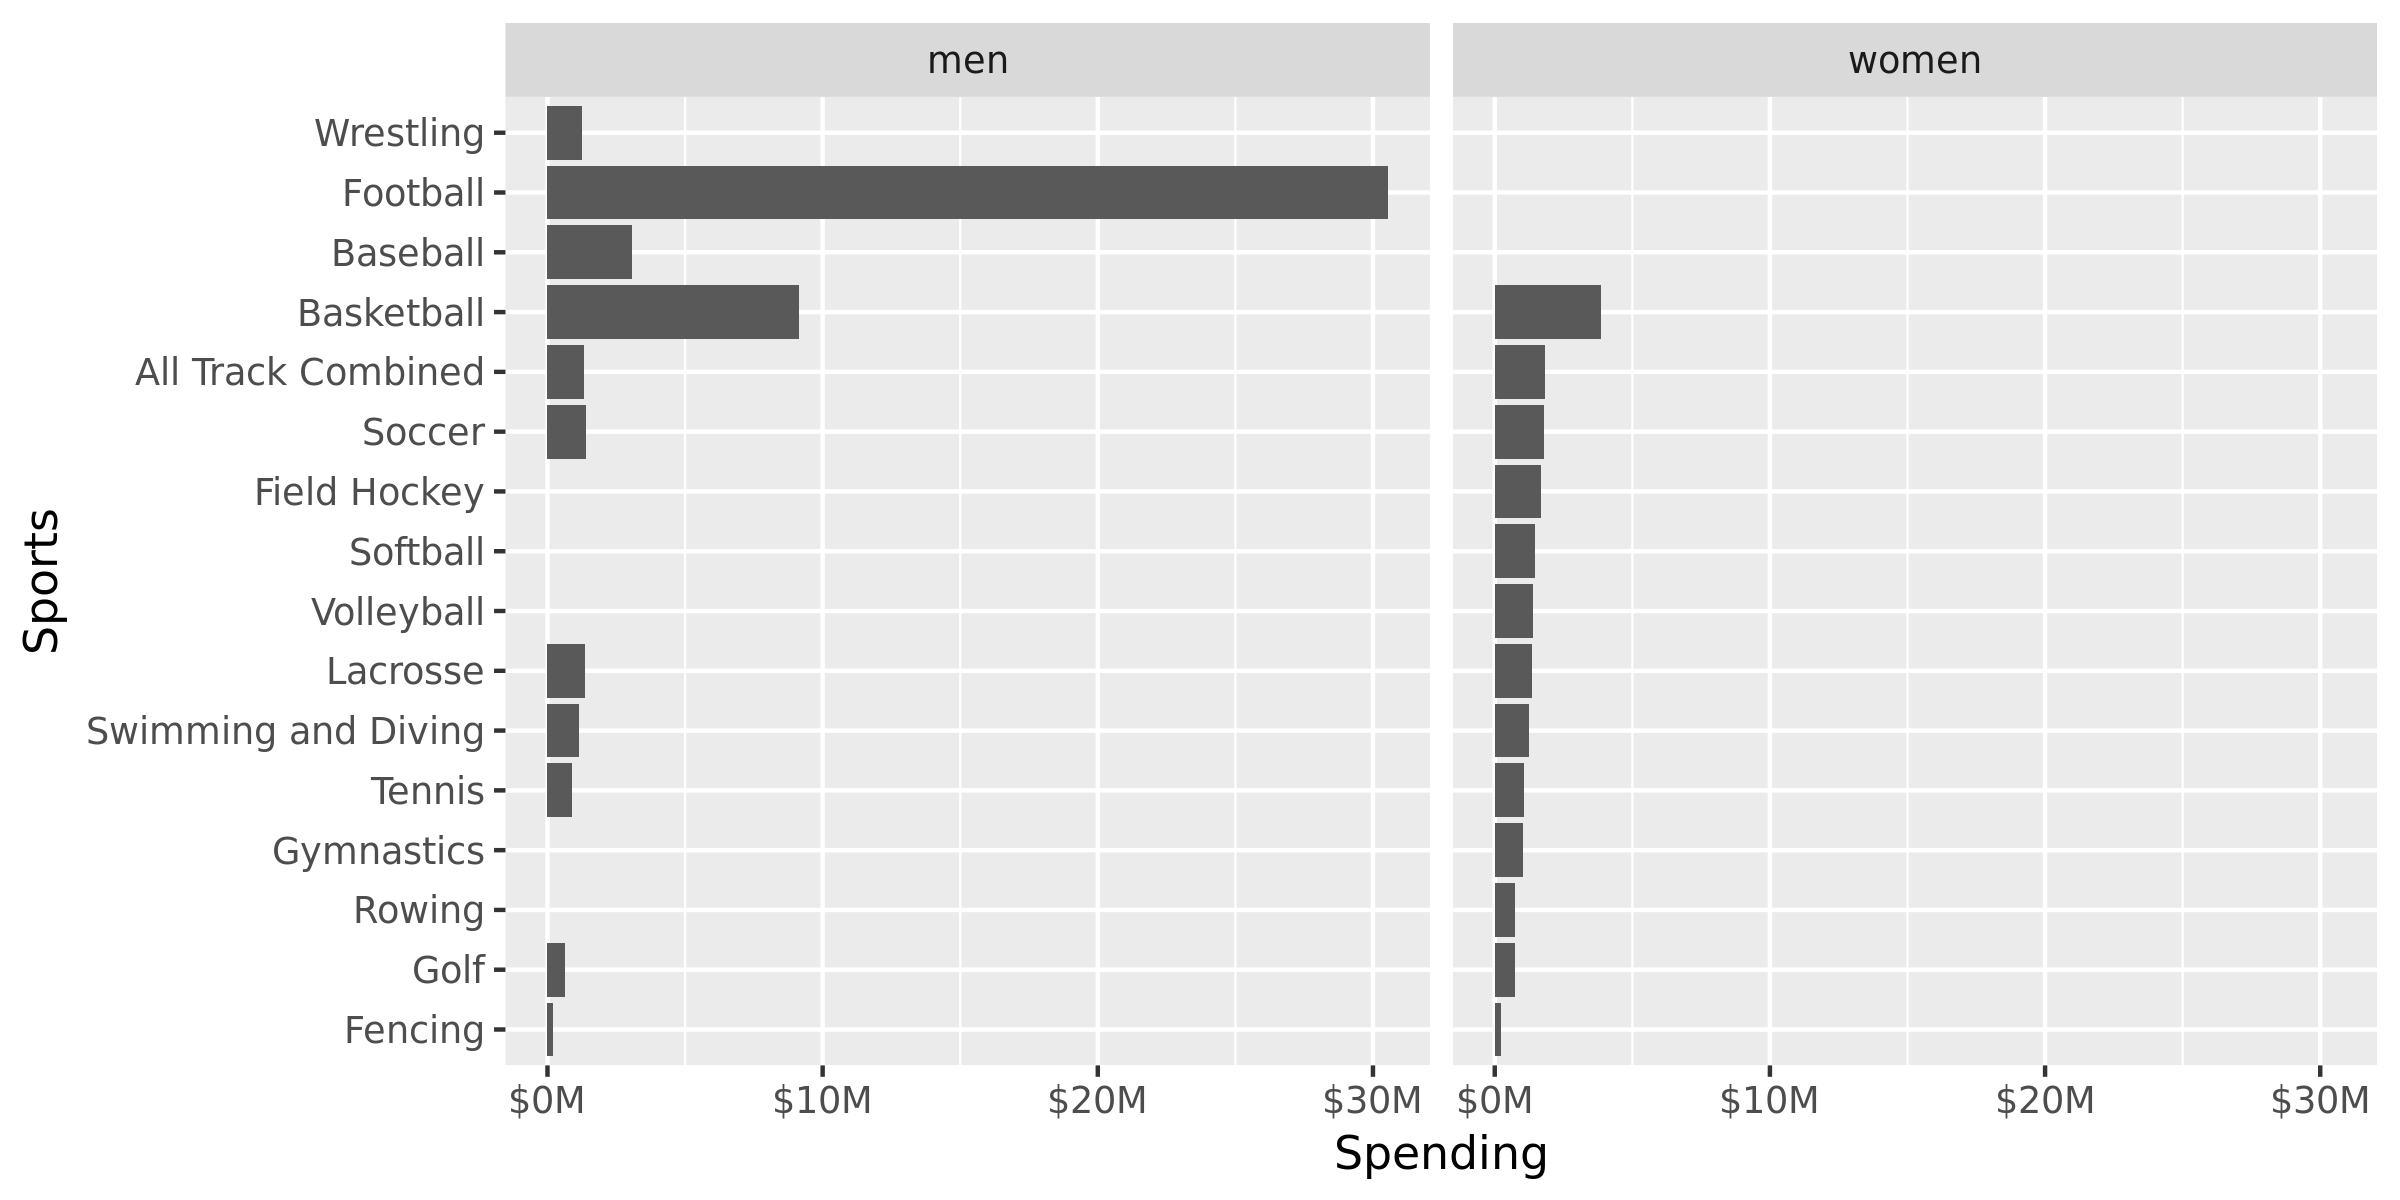

In [60]:
#options
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 8)

#this is to get the largets amount spent
df = unc_sports_spending_2019 %>%
    group_by(sports, men_or_women) %>%
    summarize(weight = expenditure_usd / 1e6)

#call df because I want to double check 
df


# bar chart code goes here
ggplot(df, aes(x = weight, y = sports))+
    geom_col() +
    facet_wrap(~men_or_women) +
    scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending', y = 'Sports') 


You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

```
The labs add a label to the specified axis, for above Spending will be the new label for the x-axis

```
